In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
uri = '../Sample data/SampleData.csv'
df = pd.read_csv(uri)
df.Total.replace(',', '', regex=True, inplace=True)
df.Total = df.Total.apply(pd.to_numeric)
df.head(5)

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
0,1/6/21,East,Jones,Pencil,95,1.99,189.05
1,1/23/21,Central,Kivell,Binder,50,19.99,999.50
2,2/9/21,Central,Jardine,Pencil,36,4.99,179.64
3,2/26/21,Central,Gill,Pen,27,19.99,539.73
4,3/15/21,West,Sorvino,Pencil,56,2.99,167.44


# Filtering

In [17]:
pvt = df[df.Region == 'East' ].pivot_table(index='Rep',
                                   columns='Item',
                                   values='Total',
                                    fill_value=0)
pvt

Item,Binder,Pen,Pen Set,Pencil
Rep,,,,
Howard,57.710000,479.04,0.00,0.00
Jones,286.253333,575.36,282.61,181.85
Parent,1619.190000,299.85,1183.26,0.00


In [26]:
pvt = df[(df.Region == 'East') |
        (df.Region == 'West')].pivot_table(index=['Region', 'Rep'],
                                   columns='Item',
                                   values='Total',
                                    fill_value=0)
pvt

Item                  Binder  Desk     Pen  Pen Set  Pencil
Region Rep                                                 
East   Howard      57.710000     0  479.04     0.00    0.00
       Jones      286.253333     0  575.36   282.61  181.85
       Parent    1619.190000     0  299.85  1183.26    0.00
West   Sorvino    139.930000   825  151.24     0.00  167.44
       Thompson  1139.430000     0    0.00     0.00   63.68

In [41]:
total_max = df.Total.max()
pvt = df[(df.Region == 'East' ) &
        (df.Total > total_max/2)].pivot_table(index='Rep',
                                   columns='Item',
                                   values='Total',
                                    fill_value=0)
pvt

Item,Binder,Pen Set
Rep,,
Parent,1619.19,1183.26


In [43]:
pvt = df[df.Rep.str.match('J')].pivot_table(index='Rep')
pvt

,Total,Unit Cost,Units
Rep,,,
Jardine,562.438,7.99,56.2
Jones,295.380,6.99,49.5


In [51]:
df[df.Rep.str.match('J')].groupby('Rep').sum()

,Units,Unit Cost,Total
Rep,,,
Jardine,281,39.95,2812.19
Jones,396,55.92,2363.04


# Compare perfomance of Rep

<AxesSubplot:xlabel='Region,Rep'>

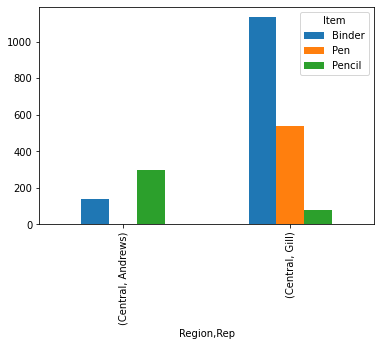

In [61]:
pvt = df[df.Rep.str.match('Gill') |
        df.Rep.str.match('Andrews')].pivot_table(
            index=['Region','Rep'], values='Total', 
            fill_value=0, columns='Item',
            aggfunc='sum')
pvt.plot.bar()

In [62]:
pvt

Item              Binder     Pen  Pencil
Region  Rep                             
Central Andrews   139.72    0.00  298.65
        Gill     1132.74  539.73   77.40